In [35]:
import os as os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sdf_helper as sh
from matplotlib.ticker import MaxNLocator
import matplotlib.colors as mcolors
%matplotlib inline

### Global Matplotlib Formatting

In [36]:
# LaTeX for plot labels
plt.rcParams['text.usetex'] = True

# Specify the LaTeX package for standard math fonts
plt.rcParams['text.latex.preamble'] = r'\usepackage{amsmath}'


plt.rcParams['xtick.labelsize'] = 20  # Example for x-axis tick labels
plt.rcParams['ytick.labelsize'] = 20 

### Plotting Function

In [37]:
class CustomNorm(mcolors.Normalize):
    def __init__(self, vmin=None, vmax=None, clip=False):
        mcolors.Normalize.__init__(self, vmin, vmax, clip)

    def __call__(self, value, clip=None):
        # Ensure input is a masked array with correct mask
        value = np.ma.masked_invalid(value)
        # Normalize positive values between 0.0 and 1.0
        res = np.ma.masked_less_equal(value, 0)
        # Map negative values to 0.0, and scale positive values between 0.5 and 1.0
        res = np.where(res.mask, 0.0, 0.5 + 0.5 * (res.data - self.vmin) / (self.vmax - self.vmin))
        return res


def plot_stacked(ds, title, zs):
    '''Input list of times ds and returns a stacked plot of current density'''
    n = len(ds)
    fig, axs = plt.subplots(n, 1, figsize=(15, 3*n), sharex=True)
    
    # Colour normalisation
    vmin, vmax = np.inf, -np.inf # Initialise vmin, vmax 

    for d in ds: 
        data = sh.getdata(d, data_dir, verbose=False) 
        current_data = getattr(data, 'Current_Jz').data 
        vmin, vmax = (min(vmin, np.min(current_data)), max(vmax, np.max(current_data))) 
        
    # Restict maximum/minimum colours or powernorm will lose a lot of detail 
    if vmin < 0:
        vmin = 0
    if vmax > 800:
        vmax = 800
    norm = mcolors.PowerNorm(gamma=0.5, vmin=int(vmin), vmax=int(vmax))

    
    #norm = CustomNorm(vmin=vmin, vmax=vmax)
    if n == 1:
        axs = [axs]
    
    for i, d in enumerate(ds):
        data = sh.getdata(d, data_dir, verbose=False)
        t = data.Last_dump_time_requested.data
        g = data.Grid_Grid
        xb = g.data[0]
        yb = g.data[1]
        current = data.Current_Jz.data
        print(d, np.max(current), np.min(current))
        X, Y = np.meshgrid(xb, yb, indexing='ij')
        
        pcm = axs[i].pcolormesh(X, Y, current, norm=norm, cmap='magma')
        axs[i].pcolormesh(X, -Y, current,norm=norm, cmap='magma')
        axs[i].set_ylim([zs[0], zs[1]])
        axs[i].set_ylabel(r'$z$', size=30)
        #axs[i].set_xlabel('x')
        #axs[i].set_title(f'Current at time t={np.round(t, 4)}', verticalalignment='bottom')
        # Set the maximum number of y-ticks
        axs[i].yaxis.set_major_locator(MaxNLocator(nbins=4))
        
        
        label = chr(97 + i)  # 97 is the ASCII code for 'a'
        axs[i].set_title(f'({label})' , font='Palentino', fontsize=20, pad=10)
        axs[i].text(0.02, 0.95, r'$t=$'+f' {np.round(t, 4)}', transform=axs[i].transAxes,
                    verticalalignment='top', horizontalalignment='left',
                    color='white', fontsize=25, fontweight=500)
        #Label each subplot 
        # Time placement alternative
        '''label = chr(97 + i)  # 97 is the ASCII code for 'a'
        axs[i].text(0.02, 0.95, f'({label}) '+ r'$t =$'+f'{np.round(t, 4)}', transform=axs[i].transAxes,
                    verticalalignment='top', horizontalalignment='left',
                    color='white', fontsize=18, fontweight=500)'''
    
    #fig.text(0.5, 0.04, 'x', ha='center')

    axs[-1].set_xlabel(r'$x$', size=30)
    cbar_left = 0.92
    cbar_bottom = 0.074 # very sensitive
    cbar_width = 0.02
    cbar_height = 0.829
    
    
    cbar_ax = fig.add_axes([cbar_left, cbar_bottom, cbar_width, cbar_height])
    cbar = fig.colorbar(pcm, cax=cbar_ax)
    cbar.set_label(r'Current Density $J_y$', size=30, font='ariel')
    fig.suptitle(fr'Current density $J_y$ at various times for {title}', size=35)
    plt.tight_layout(rect=[0, 0, 0.92, 1])
    
    plt.show()
    return fig

### Sweet-Parker Regime $S_L = 3.16 \times 10^3$

In [61]:
simulation = '/volumes/My Passport/MMath Project/sim_800_7'
os.chdir(simulation)
data_dir = 'Data'
data = sh.getdata(2,data_dir, verbose=False)

2 160.6526682008569 -7.848716412569564
100 84.38574216077261 -88.51946225086112
270 39.4681407050192 -34.868925889961616
390 2.4956506856830147 -6.734764040205647


/Users/Conanliptrott/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:82: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.


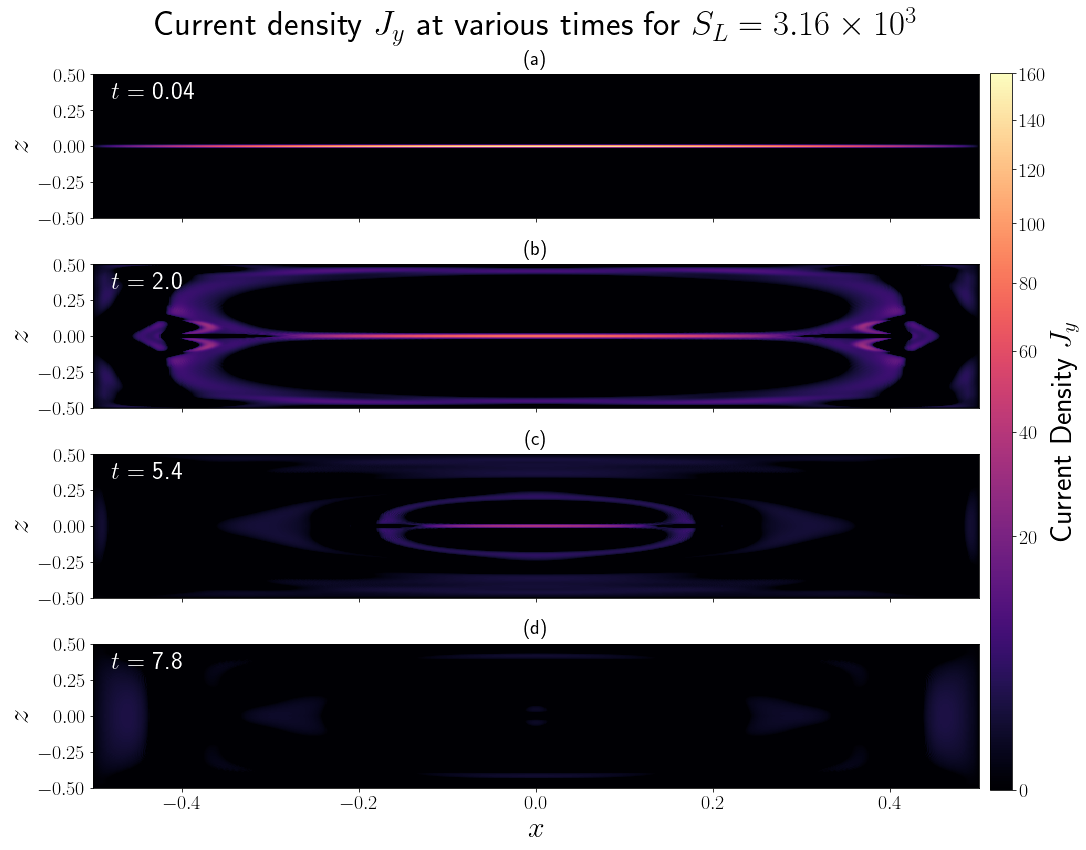

In [63]:
fig = plot_stacked([2,100, 270, 390], r'$S_L = 3.16 \times 10^3$', [-0.5, 0.5])
#fig.savefig('sweet_parker_7_full.png', bbox_inches='tight') 


### Marginally Unstable Regime $S_L = 3.16 \times 10^4$

In [64]:
simulation = '/volumes/My Passport/MMath Project/sim_800_11'
os.chdir(simulation)
data_dir = 'Data'
data = sh.getdata(0,data_dir, verbose=False)

2 517.560304898924 -7.853453711860928
161 293.68175724066276 -273.2772815012051
222 535.7590553153899 -260.01715307515246
299 315.299962078506 -466.3931854844104


/Users/Conanliptrott/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:82: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.


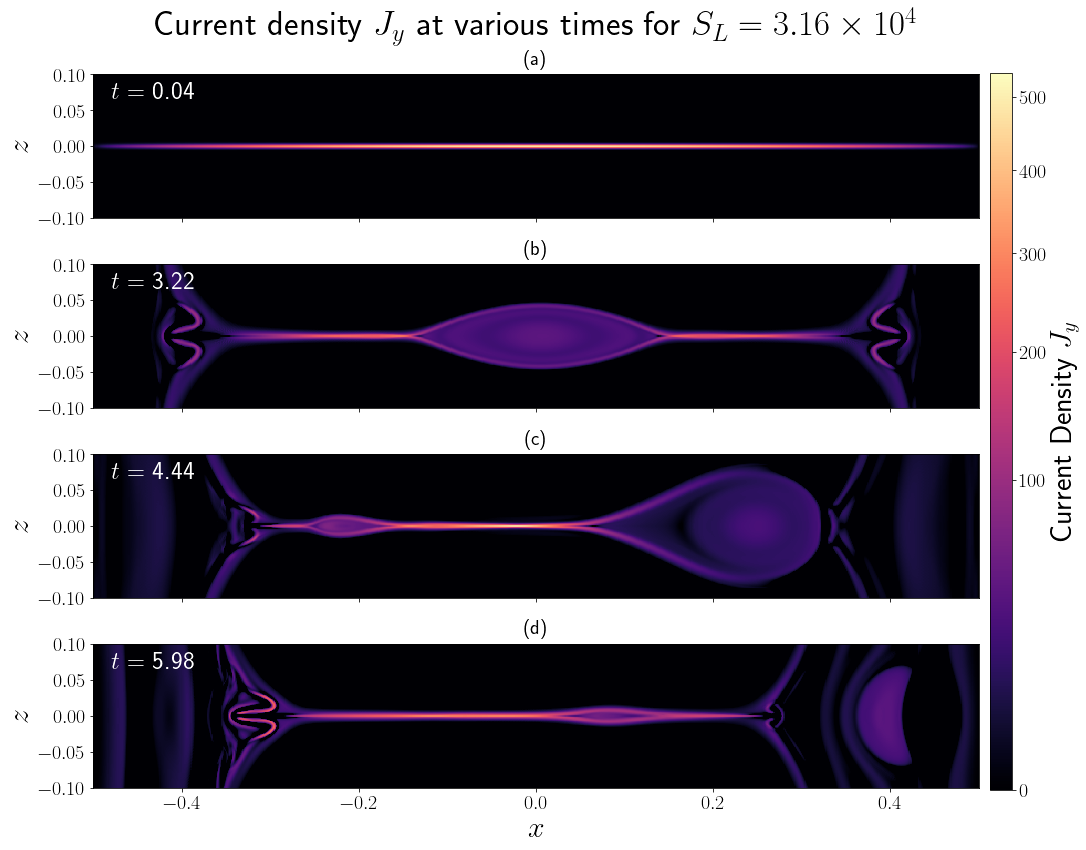

In [65]:
fig = plot_stacked([2,161, 222, 299], r'$S_L = 3.16 \times 10^4$', [-0.1,0.1])
#fig.savefig('marginally_unstable_stack.png', bbox_inches='tight') 

### Plasmoid-Mediated Fractal Tearing Regime $S_L = 3.16 \times 10^5$

In [71]:
simulation = '/volumes/My Passport/MMath Project/sim_800_15'
os.chdir(simulation)
data_dir = 'Data'
data = sh.getdata(0,data_dir, verbose=False)

47 1783.7235331977606 -992.6932772776988
71 1902.701580236474 -599.2341016577709
97 1684.3137180991223 -467.2154592190443
107 2053.128181537633 -574.7407899359648


/Users/Conanliptrott/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:85: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.


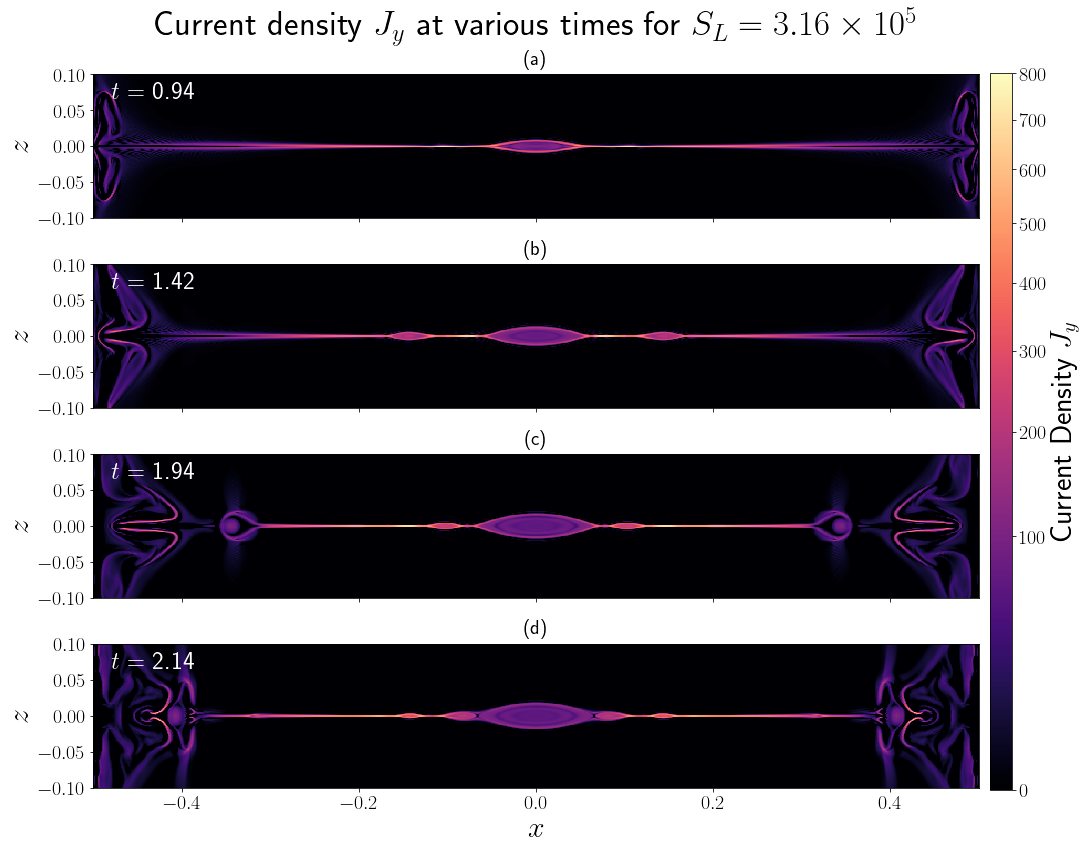

In [73]:
fig = plot_stacked([47,71, 97, 107], r'$S_L = 3.16 \times 10^5$', [-0.1,0.1])
#fig.savefig('plasmoid_fractal_stack.png', bbox_inches='tight') 

### Plasmoid-Mediated Non-Linear Regime $S_L = 3.16 \times 10^5$

In [ ]:
simulation = '/volumes/My Passport/MMath Project/sim_800_15'
os.chdir(simulation)
data_dir = 'Data'
data = sh.getdata(0,data_dir, verbose=False)

231 2225.9920344085713 -901.9444226462474
272 1977.4834345628865 -888.78625257393
349 1919.3387685363718 -641.1599665189566
373 1769.4480030649956 -544.2605609966115


/Users/Conanliptrott/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:85: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.


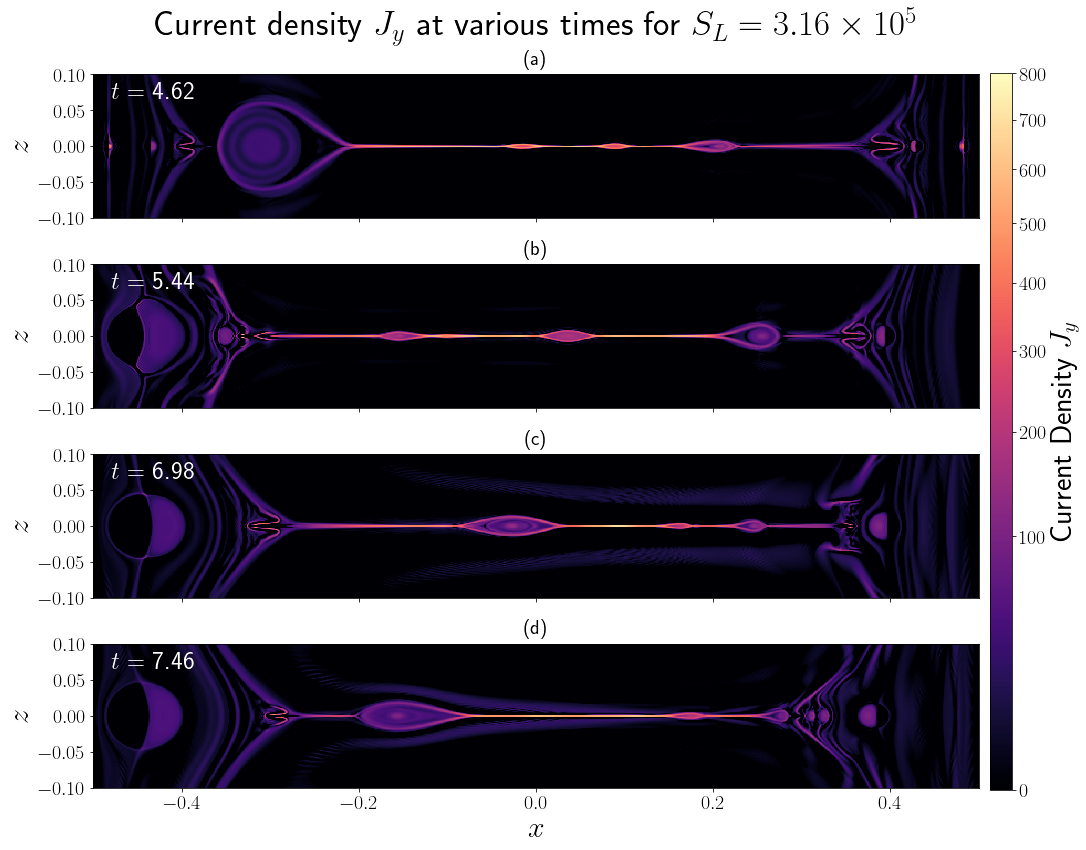

In [ ]:
fig = plot_stacked([231,272, 349, 373], r'$S_L = 3.16 \times 10^5$', [-0.1,0.1])
#fig.savefig('plasmoid_non_linear_stack.png', bbox_inches='tight') 

### Hall Reconnection $S_L = 10^5$, $\lambda_i = 0.1$

In [ ]:
simulation = '/local_raid/honproj2/conan/sim_13_hall_2'
os.chdir(simulation)
data_dir = 'Data'
data = sh.getdata(0,data_dir, verbose=False)

3 837.8966838599999 -45.66249098068938
45 551.1483739566766 -108.25865037866718
66 470.87967189717546 -52.29463476958123
74 379.63255914023284 -107.2733849615845
90 267.0407358889505 -164.54584587022435


/tmp/ipykernel_897156/1202177018.py:85: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout(rect=[0, 0, 0.92, 1])


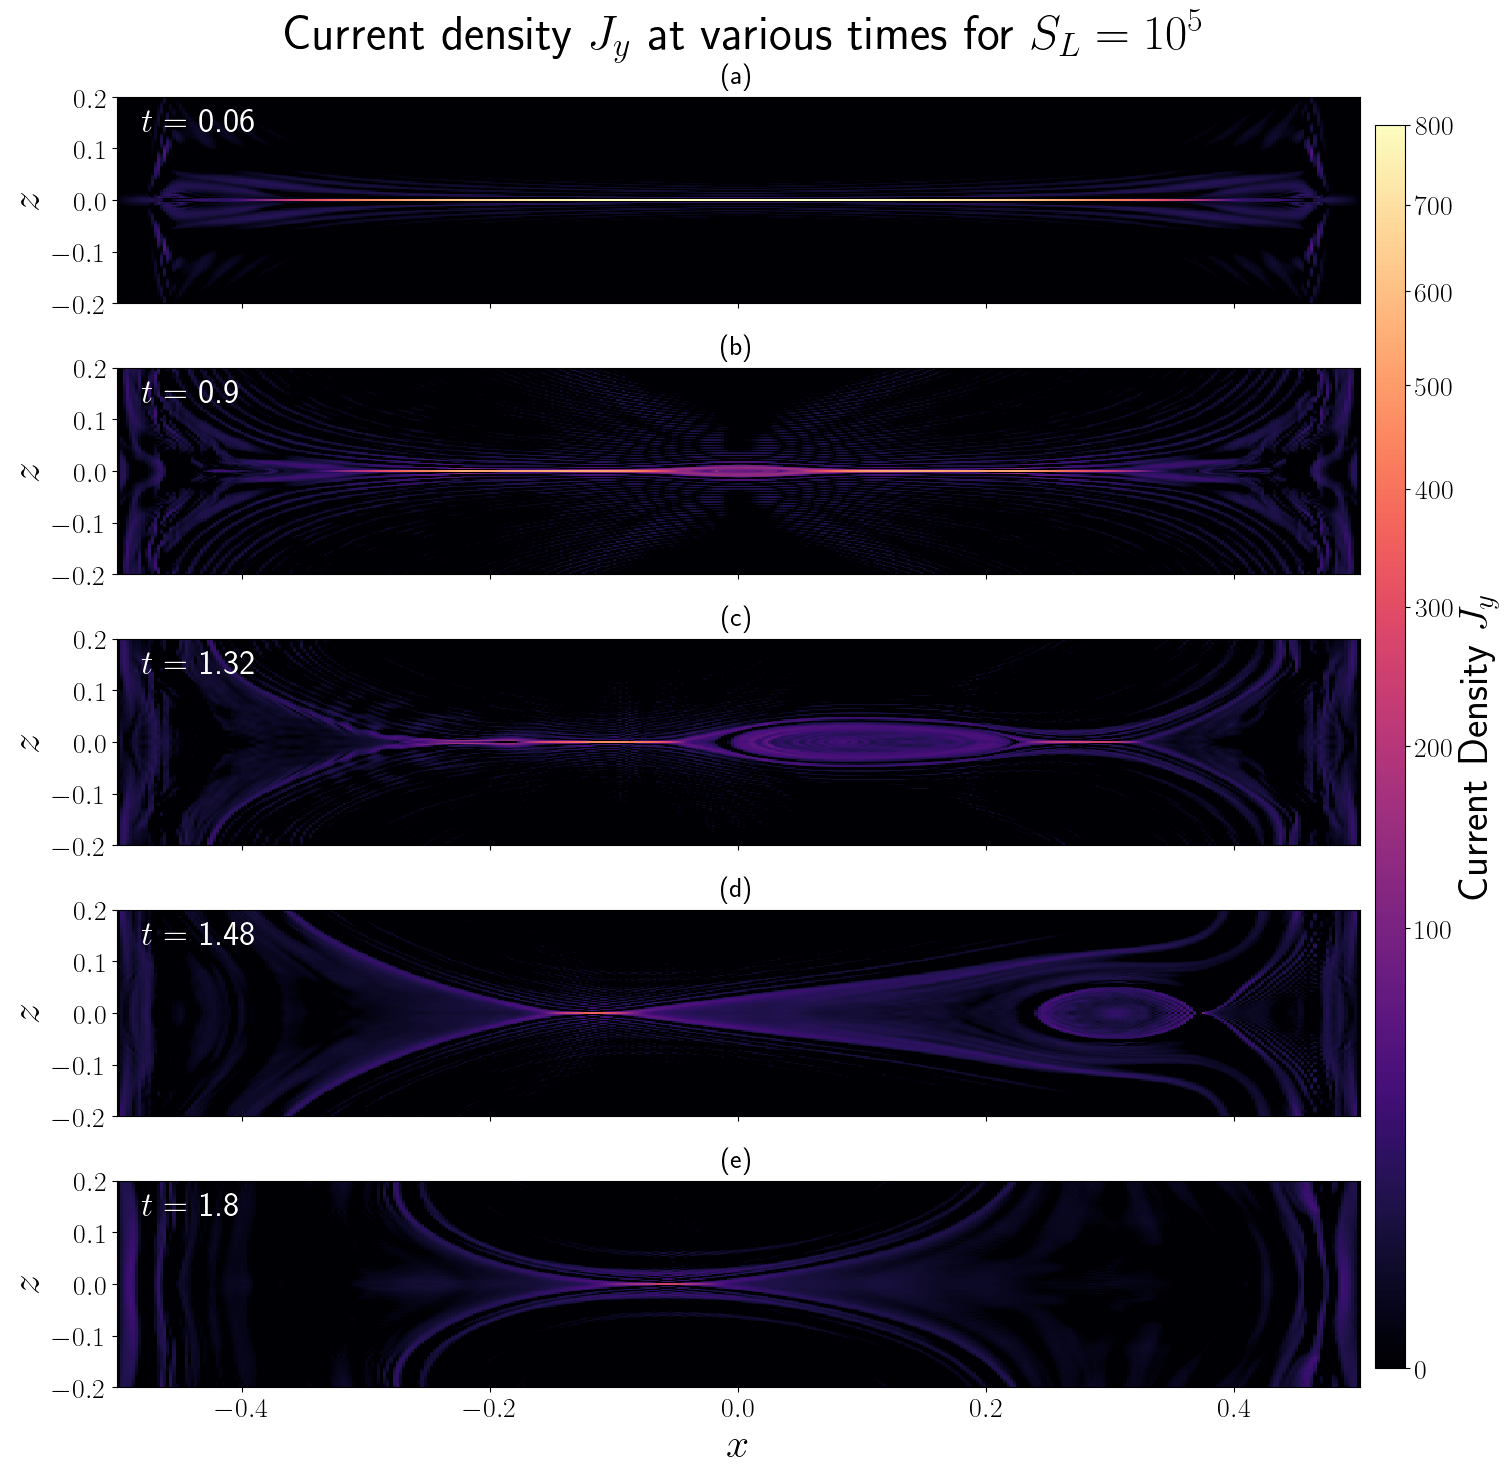

In [ ]:
fig = plot_stacked([3,45,66,74, 90], r'$S_L = 10^5$', [-0.2,0.2])
#fig.savefig('hall_sim_13_stack.png', bbox_inches='tight') 

### Hall Reconnection $S_L = 10^5$, $\lambda_i = 1$

In [5]:
simulation = '/local_raid/honproj2/conan/sim_13_hall_3'
os.chdir(simulation)
data_dir = 'Data'
data = sh.getdata(0,data_dir, verbose=False)

1 809.3498020298916 -125.75383359875948
7 840.7209252560568 -140.372912675071
10 705.8035693634985 -249.86098103032376
15 669.5858618928967 -171.30245083414562
18 496.17204449876067 -113.47979879355776


/tmp/ipykernel_377897/1202177018.py:85: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout(rect=[0, 0, 0.92, 1])


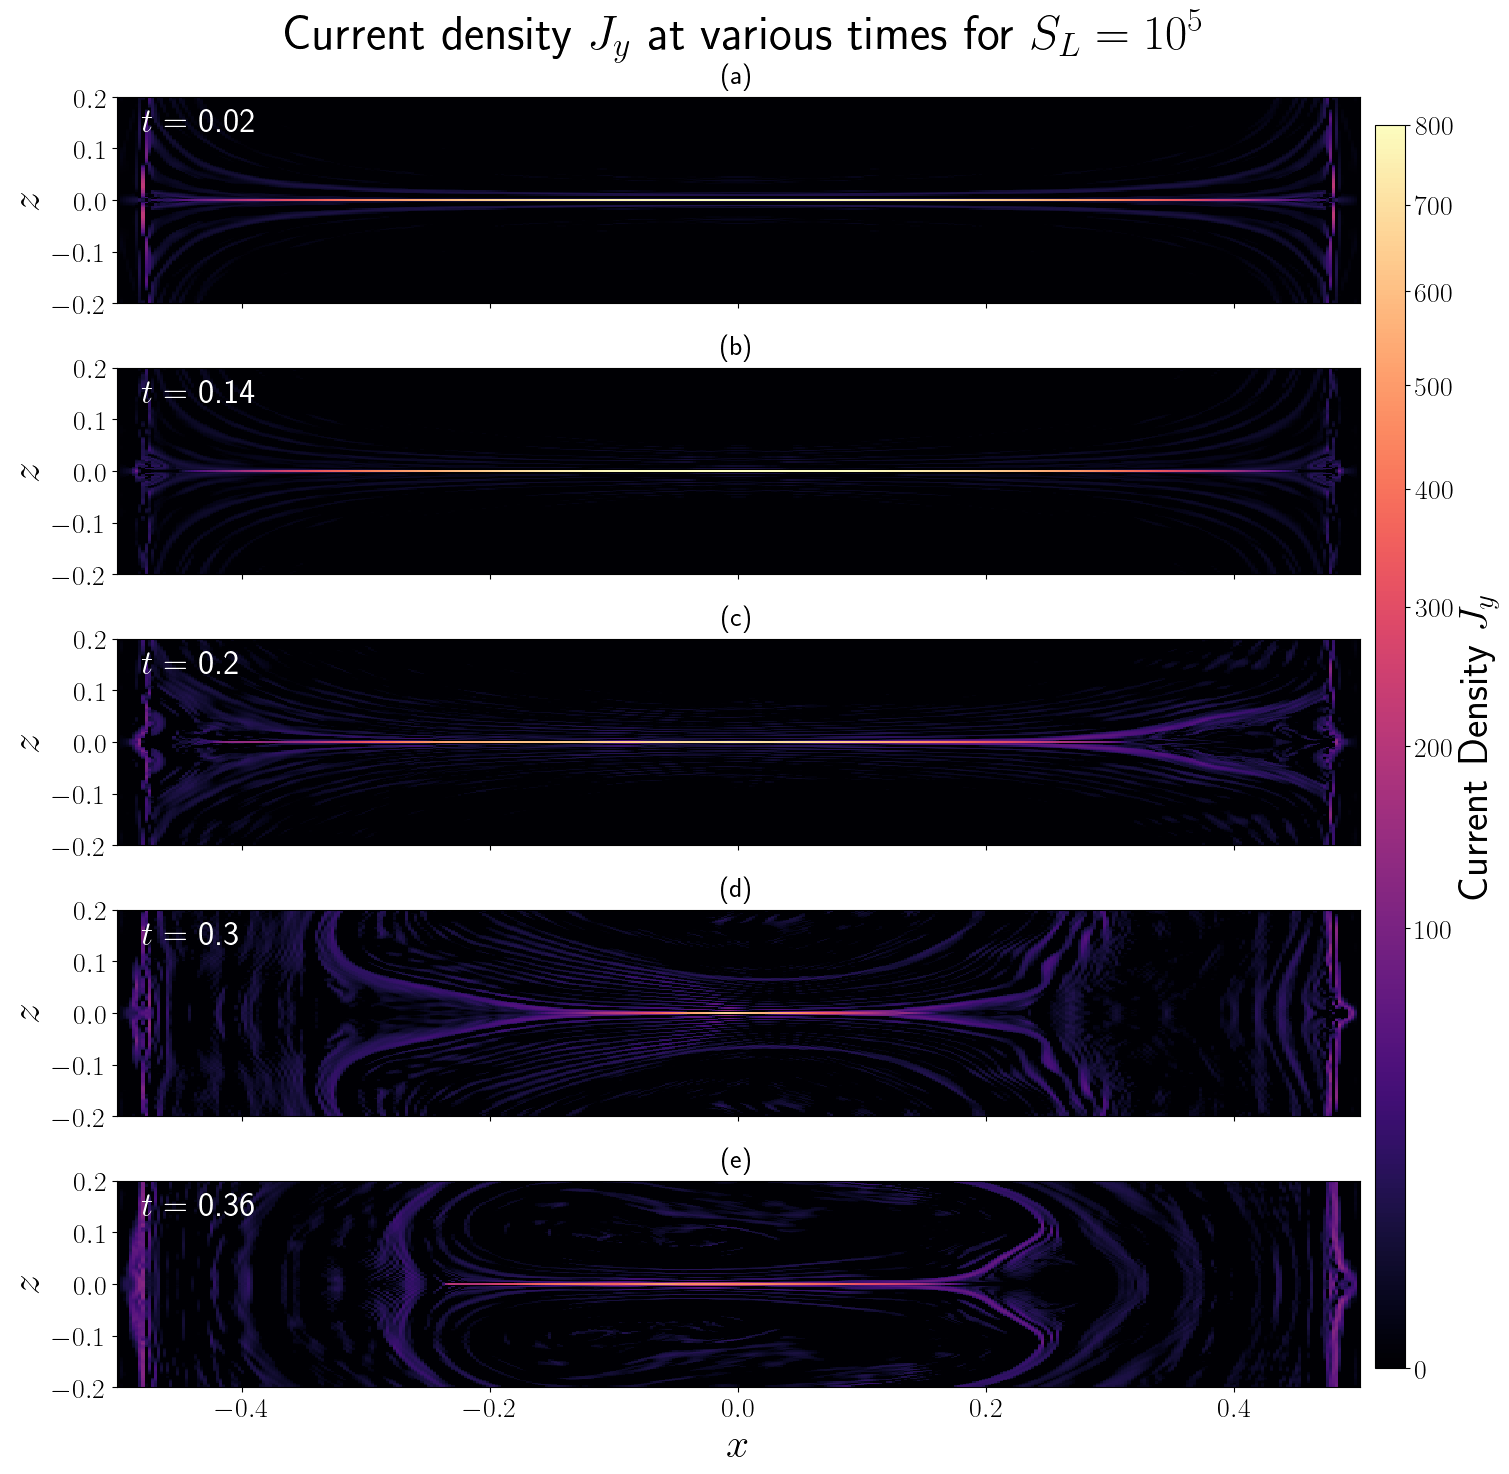

In [34]:
fig = plot_stacked([1,7,10,15, 18], r'$S_L = 10^5$', [-0.2,0.2])
#fig.savefig('hall_sim_13_stack.png', bbox_inches='tight') 

### Hall Reconnection $S_L = 10^5$, $\lambda_i = 0.045$

In [41]:
simulation = '/local_raid/honproj2/conan/sim_13_hall_5'
os.chdir(simulation)
data_dir = 'Data'
data = sh.getdata(0,data_dir, verbose=False)

10 780.667547644138 -84.1284044431185
90 782.9278607403319 -47.6336242906593
92 802.260665654822 -69.4936679773447
134 382.49737297955016 -188.34470367709622
136 448.06313585646944 -189.18308624971505


/tmp/ipykernel_377897/1202177018.py:85: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout(rect=[0, 0, 0.92, 1])


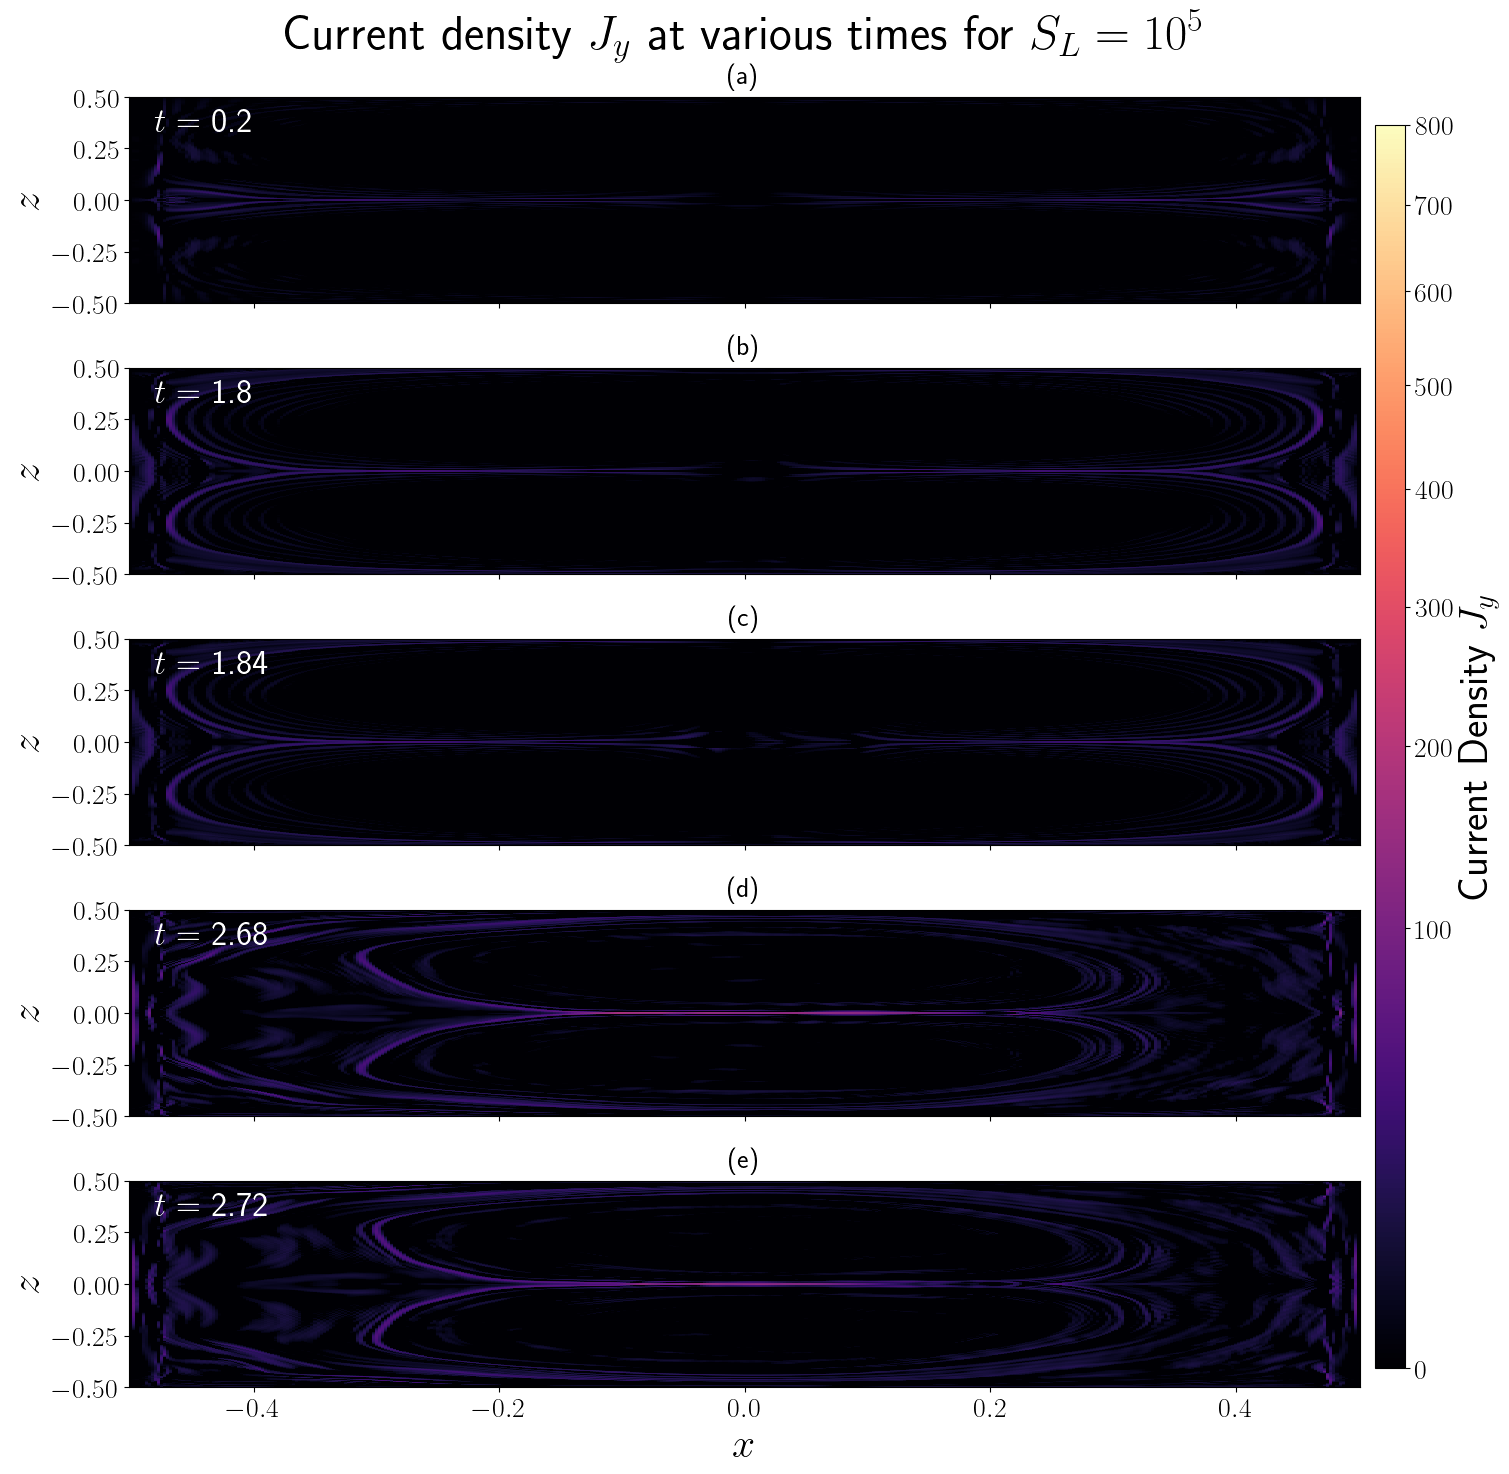

In [42]:
fig = plot_stacked([10,90,92,134,136], r'$S_L = 10^5$', [-0.5,0.5])
#fig.savefig('hall_sim_13_stack.png', bbox_inches='tight') 